In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['name', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [6]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [7]:
# Defining the model architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(29,)))
model.add(tf.keras.layers.Embedding(input_dim=29, output_dim=64)),
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')),
model.add(tf.keras.layers.MaxPooling1D(pool_size=2)),
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')),
model.add(tf.keras.layers.MaxPooling1D(pool_size=2)),
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')),
model.add(tf.keras.layers.GlobalMaxPooling1D()),
model.add(tf.keras.layers.Dense(256, activation='relu')),
model.add(tf.keras.layers.Dropout(0.4)),
model.add(tf.keras.layers.Dense(64, activation='relu')),
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(), metrics=['accuracy'])

In [9]:
hist = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=10)

Epoch 1/10
19508/19508 [==============================] - 399s 20ms/step - loss: 0.1407 - accuracy: 0.9440 - val_loss: 0.1339 - val_accuracy: 0.9466
Epoch 2/10
19508/19508 [==============================] - 392s 20ms/step - loss: 0.1373 - accuracy: 0.9458 - val_loss: 0.1333 - val_accuracy: 0.9466
Epoch 3/10
19508/19508 [==============================] - 396s 20ms/step - loss: 0.1347 - accuracy: 0.9467 - val_loss: 0.1301 - val_accuracy: 0.9493
Epoch 4/10
19508/19508 [==============================] - 394s 20ms/step - loss: 0.1330 - accuracy: 0.9477 - val_loss: 0.1305 - val_accuracy: 0.9480
Epoch 5/10
19508/19508 [==============================] - 384s 20ms/step - loss: 0.1315 - accuracy: 0.9481 - val_loss: 0.1235 - val_accuracy: 0.9510
Epoch 6/10
19508/19508 [==============================] - 397s 20ms/step - loss: 0.1304 - accuracy: 0.9486 - val_loss: 0.1241 - val_accuracy: 0.9507
Epoch 7/10
19508/19508 [==============================] - 395s 20ms/step - loss: 0.1291 - accuracy: 0.9490

In [17]:
model.save('../../models/gender-conv1d-base.h5')

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 29, 64)            1856      
                                                                 
 conv1d_3 (Conv1D)           (None, 29, 16)            3088      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 14, 16)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 14, 32)            1568      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 7, 32)            0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 7, 64)            

In [19]:
score = model.evaluate(x_train, y_train)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

19508/19508 [==============================] - 137s 7ms/step - loss: 0.1201 - accuracy: 0.9525

ACCURACY: 0.9525247812271118
LOSS: 0.12010932713747025


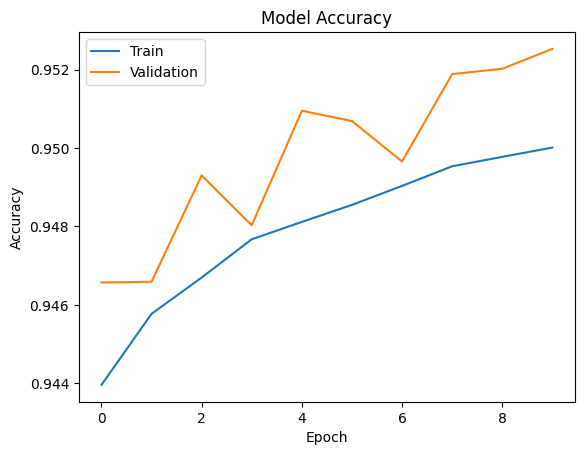

In [20]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

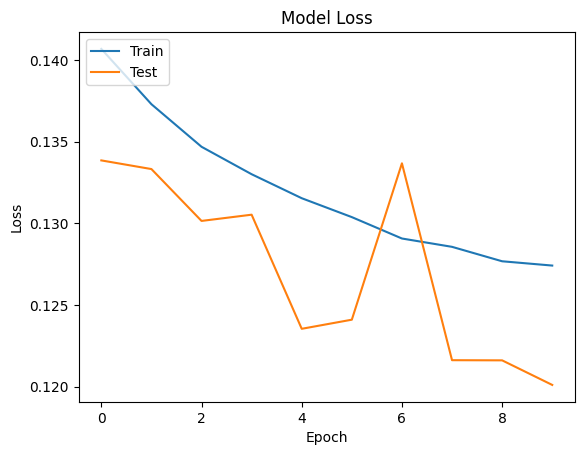

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 73s 4ms/step
Accuracy: 95.25%


In [16]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.95590   0.95204   0.95397    322538
           1    0.94895   0.95304   0.95099    301703

    accuracy                        0.95252    624241
   macro avg    0.95242   0.95254   0.95248    624241
weighted avg    0.95254   0.95252   0.95253    624241



In [1]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model('../../models/gender-conv1d-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik',
  'Rizki Saputri'
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-26 11:10:04.149551: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 881ms/step
Novi Gustiana = Female
1/1 [==============================] - 0s 14ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 13ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 14ms/step
Padli Nofrizal = Male
1/1 [==============================] - 0s 13ms/step
Putri Wahyuni = Female
1/1 [==============================] - 0s 14ms/step
Rahmat Hidayat = Male
1/1 [==============================] - 0s 14ms/step
Rahmi Andreni = Female
1/1 [==============================] - 0s 13ms/step
Rian Aries Fani = Male
1/1 [==============================] - 0s 14ms/step
Riandi Selvi = Male
1/1 [==============================] - 0s 13ms/step
Rianto = Male
1/1 [==============================] - 0s 13ms/step
Ridha Ulva = Female
1/1 [==============================] - 0s 12ms/step
Rizqi Wahyuningsih = Female
1/1 [==============================] - 0s 12ms/step
Ruwadi Saputra = Male
1/1 [===========================